In [10]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [11]:
fashion_mnist = keras.datasets.fashion_mnist

In [12]:
(training_images,training_labels),(test_images,test_labels)  = fashion_mnist.load_data()

In [13]:
training_images = training_images.reshape(60000,28,28,1)
training_images = training_images/255
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images/255

In [15]:
model = keras.models.Sequential([
    Conv2D(64,(3,3),activation = 'relu',input_shape =(28,28,1)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3),activation = 'relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128,activation = 'relu'),
    Dense(10,activation = 'softmax')
    
])

In [17]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [21]:
model.fit(training_images,training_labels,epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 118s 2ms/sample - loss: 0.4422s - 
Epoch 2/5
60000/60000 [==============================] - 118s 2ms/sample - loss: 0.2935
Epoch 3/5
60000/60000 [==============================] - 127s 2ms/sample - loss: 0.2466
Epoch 4/5
60000/60000 [==============================] - 135s 2ms/sample - loss: 0.2147
Epoch 5/5
60000/60000 [==============================] - 118s 2ms/sample - loss: 0.1868


In [25]:
test_loss = model.evaluate(test_images,test_labels)
print(test_loss)

10000/10000 [==============================] - 5s 483us/sample - loss: 0.2564
0.2563854713380337


In [26]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


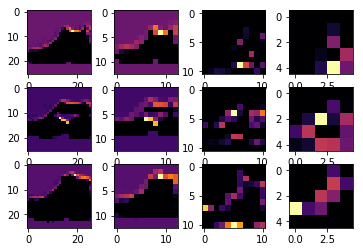

In [34]:
import matplotlib.pyplot as plt
from tensorflow.keras import models
f,axarr = plt.subplots(3,4)
FIRST_IMAGE = 0
SECOND_IMAGE = 23
THIRD_IMAGE = 28
CONVOLUTION_NUMBER = 2

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)
